Decision Tree and Random Forest

In [1]:
import sys
sys.path.append('../libs')  # Update this path according to the location of your 'dataset' module

import dataset
import preprocessing
import classes
import numpy as np
import dataset
import preprocessing
import classes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier


Import the Files and splita the data for training and test

In [2]:
# Load features
features = np.load("../Files/development_numpy/development.npy")

# Load labels
labels_df = pd.read_csv("../Files/metadata/development.csv")
#print(labels_df.head())
labels = labels_df['word'] 

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


Flatten the data for training

In [3]:
print("Shape of X_train:", X_train.shape)

# Flatten each sample into a one-dimensional array
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Check the new shape of the flattened arrays
print("New shape of X_train_flat:", X_train_flat.shape)

Shape of X_train: (36236, 175, 44)
New shape of X_train_flat: (36236, 7700)


Train Descision Tree Classifier and print result

In [13]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier with the flattened data
dt_classifier.fit(X_train_flat, y_train)

# Predict on the flattened test set
dt_predictions = dt_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Decision Tree Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))


Decision Tree Classifier Performance:
Accuracy: 0.7100441501103752
              precision    recall  f1-score   support

       Alarm       0.66      0.69      0.68       412
    Brötchen       0.59      0.60      0.59       379
   Fernseher       0.62      0.64      0.63       388
        Haus       0.74      0.72      0.73       432
     Heizung       0.68      0.71      0.69       403
     Leitung       0.73      0.70      0.72       425
       Licht       0.62      0.70      0.66       387
     Lüftung       0.73      0.73      0.73       423
        Ofen       0.53      0.59      0.55       388
       Radio       0.69      0.69      0.69       404
    Schraube       0.81      0.79      0.80       398
     Spiegel       0.84      0.84      0.84       387
 Staubsauger       0.74      0.76      0.75       368
          an       0.71      0.69      0.70       442
         aus       0.71      0.74      0.72       401
        kann       0.73      0.72      0.73       421
       nicht  

Try to find the best parameters to improve accuracy 

In [18]:
# Set up the parameters grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_flat, y_train)

# Find the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Train the classifier with the best parameters
dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
dt_classifier.fit(X_train_flat, y_train)

# Predict on the test set
dt_predictions = dt_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Tuned Decision Tree Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters: {'max_depth': 40, 'min_samples_leaf': 4, 'min_samples_split': 10}
Tuned Decision Tree Classifier Performance:
Accuracy: 0.7162251655629139
              precision    recall  f1-score   support

       Alarm       0.64      0.73      0.68       412
    Brötchen       0.58      0.61      0.59       379
   Fernseher       0.62      0.68      0.65       388
        Haus       0.74      0.74      0.74       432
     Heizung       0.67      0.70      0.69       403
     Leitung       0.70      0.71      0.70       425
       Licht       0.62      0.69      0.65       387
     Lüftung       0.73      0.74      0.73       423
        Ofen       0.55      0.60      0.57       388
       Radio       0.66      0.71      0.69       404
    Schraube       0.77      0.79      0.78       398
     Spiegel       0.86      0.85      0.85       387
 Staubsauger       0.79      0.77      0.78       368
          an       0.74  

In [20]:
# Train the classifier with best parameters and cost complexity pruning
dt_classifier_pruned = DecisionTreeClassifier(**best_params, random_state=42, ccp_alpha=0.01)  # Adjust ccp_alpha based on validation curve analysis
dt_classifier_pruned.fit(X_train_flat, y_train)

# Predict on the test set
dt_pruned_predictions = dt_classifier_pruned.predict(X_test_flat)

# Evaluate the classifier
print("Pruned Decision Tree Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, dt_pruned_predictions))
print(classification_report(y_test, dt_pruned_predictions))

Pruned Decision Tree Classifier Performance:
Accuracy: 0.40927152317880794
              precision    recall  f1-score   support

       Alarm       0.00      0.00      0.00       412
    Brötchen       0.41      0.32      0.36       379
   Fernseher       0.00      0.00      0.00       388
        Haus       0.71      0.63      0.67       432
     Heizung       0.00      0.00      0.00       403
     Leitung       0.00      0.00      0.00       425
       Licht       0.00      0.00      0.00       387
     Lüftung       0.63      0.56      0.59       423
        Ofen       0.00      0.00      0.00       388
       Radio       0.67      0.49      0.57       404
    Schraube       0.76      0.52      0.61       398
     Spiegel       0.52      0.68      0.59       387
 Staubsauger       0.43      0.48      0.46       368
          an       0.35      0.64      0.45       442
         aus       0.80      0.46      0.58       401
        kann       0.00      0.00      0.00       421
      

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_flat, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

Random Forest Classifier Performance:
Accuracy: 0.9108167770419426
              precision    recall  f1-score   support

       Alarm       0.88      0.94      0.91       412
    Brötchen       0.96      0.92      0.94       379
   Fernseher       0.95      0.93      0.94       388
        Haus       0.88      0.88      0.88       432
     Heizung       0.96      0.95      0.95       403
     Leitung       0.95      0.92      0.94       425
       Licht       0.89      0.89      0.89       387
     Lüftung       0.96      0.92      0.94       423
        Ofen       0.76      0.75      0.75       388
       Radio       0.95      0.95      0.95       404
    Schraube       0.95      0.96      0.95       398
     Spiegel       0.95      0.96      0.96       387
 Staubsauger       0.98      0.95      0.96       368
          an       0.88      0.92      0.90       442
         aus       0.86      0.86      0.86       401
        kann       0.92      0.86      0.89       421
       nicht  

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_flat, y_train)

# Find the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Train the classifier with the best parameters
rf_classifier = RandomForestClassifier(**best_params, random_state=42)
rf_classifier.fit(X_train_flat, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Tuned Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))


Fitting 3 folds for each of 810 candidates, totalling 2430 fits


In [7]:
# Define your best parameters if you have already tuned them
best_params = {
    'n_estimators': 200,
    'max_features': 'auto',
    'max_depth': 30,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'bootstrap': True
}

# Initialize the Random Forest Classifier with best parameters
rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_flat, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=30, max_features='auto', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200, random_state=42)

In [8]:
# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))


Random Forest Classifier Performance:
Accuracy: 0.9132450331125828
              precision    recall  f1-score   support

       Alarm       0.89      0.93      0.91       412
    Brötchen       0.97      0.92      0.94       379
   Fernseher       0.94      0.92      0.93       388
        Haus       0.88      0.89      0.88       432
     Heizung       0.96      0.95      0.95       403
     Leitung       0.97      0.92      0.94       425
       Licht       0.91      0.88      0.89       387
     Lüftung       0.95      0.95      0.95       423
        Ofen       0.78      0.75      0.76       388
       Radio       0.96      0.95      0.95       404
    Schraube       0.96      0.97      0.96       398
     Spiegel       0.94      0.97      0.95       387
 Staubsauger       0.98      0.94      0.96       368
          an       0.89      0.91      0.90       442
         aus       0.87      0.86      0.86       401
        kann       0.91      0.88      0.89       421
       nicht  

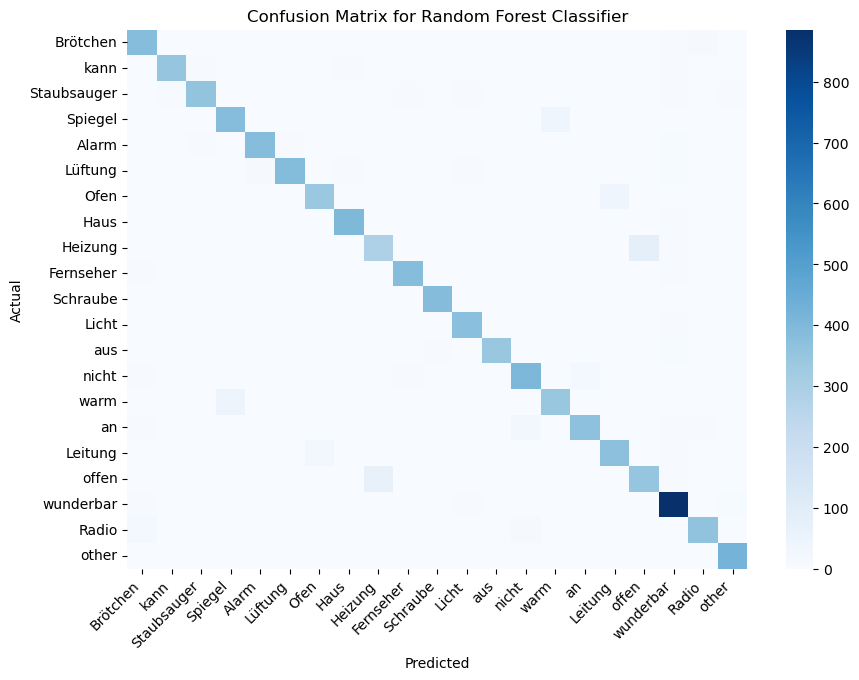

In [32]:
# Generate the confusion matrix
confmat = confusion_matrix(y_test, rf_predictions)

# Load labels
y_labels = pd.read_csv("../Files/metadata/development.csv")['word']

# Define class names (replace with actual class names from your dataset)
classes = y_labels.unique().tolist()

plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(confmat, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Random Forest Classifier')


# Save the confusion matrix as a PNG file
plt.savefig('confusion_matrix.png')

plt.show()

In [7]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_flat, y_train)

# Find the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Train the classifier with the best parameters
rf_classifier = RandomForestClassifier(**best_params, random_state=42)
rf_classifier.fit(X_train_flat, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Tuned Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))



Fitting 3 folds for each of 144 candidates, totalling 432 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Tuned Random Forest Classifier Performance:
Accuracy: 0.9247240618101545
              precision    recall  f1-score   support

       Alarm       0.91      0.95      0.93       412
    Brötchen       0.97      0.95      0.96       379
   Fernseher       0.97      0.94      0.95       388
        Haus       0.90      0.90      0.90       432
     Heizung       0.97      0.97      0.97       403
     Leitung       0.98      0.94      0.96       425
       Licht       0.91      0.87      0.89       387
     Lüftung       0.97      0.95      0.96       423
        Ofen       0.78      0.77      0.78       388
       Radio       0.97      0.95      0.96       404
    Schraube       0.95      0.97      0.96       398
     Spiegel       0.95      0.97      0.96       387
 Staubsauger       0.98      0.94      0.96       368
          an       0.91      0.92      0.91       442
         aus       0.88      0.89      0.89       401
        kann       0.93      0.89      0.91       421
       n

In [8]:
# Define your best parameters if you have already tuned them
best_params = {
    'n_estimators': 200,
    'max_features': 'auto',
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'bootstrap': False
}

# Initialize the Random Forest Classifier with best parameters
rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_flat, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(bootstrap=False, max_features='auto',
                       min_samples_split=5, n_estimators=200, random_state=42)

In [9]:
# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))



Random Forest Classifier Performance:
Accuracy: 0.9247240618101545
              precision    recall  f1-score   support

       Alarm       0.91      0.95      0.93       412
    Brötchen       0.97      0.95      0.96       379
   Fernseher       0.97      0.94      0.95       388
        Haus       0.90      0.90      0.90       432
     Heizung       0.97      0.97      0.97       403
     Leitung       0.98      0.94      0.96       425
       Licht       0.91      0.87      0.89       387
     Lüftung       0.97      0.95      0.96       423
        Ofen       0.78      0.77      0.78       388
       Radio       0.97      0.95      0.96       404
    Schraube       0.95      0.97      0.96       398
     Spiegel       0.95      0.97      0.96       387
 Staubsauger       0.98      0.94      0.96       368
          an       0.91      0.92      0.91       442
         aus       0.88      0.89      0.89       401
        kann       0.93      0.89      0.91       421
       nicht  

In [6]:

# Define your best parameters if you have already tuned them
best_params = {
    'n_estimators': 300,
    'max_features': 'auto',
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'bootstrap': False
}

# Initialize the Random Forest Classifier with best parameters
rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_flat, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Classifier Performance:
Accuracy: 0.9271523178807947
              precision    recall  f1-score   support

       Alarm       0.91      0.95      0.93       412
    Brötchen       0.97      0.94      0.96       379
   Fernseher       0.97      0.94      0.95       388
        Haus       0.91      0.90      0.90       432
     Heizung       0.97      0.97      0.97       403
     Leitung       0.98      0.95      0.96       425
       Licht       0.92      0.88      0.90       387
     Lüftung       0.97      0.95      0.96       423
        Ofen       0.79      0.77      0.78       388
       Radio       0.98      0.96      0.97       404
    Schraube       0.96      0.97      0.96       398
     Spiegel       0.96      0.97      0.96       387
 Staubsauger       0.99      0.95      0.97       368
          an       0.91      0.92      0.91       442
         aus       0.88      0.90      0.89       401
        kann       0.93      0.90      0.92       421
       nicht  

In [17]:

# Define your best parameters if you have already tuned them
best_params = {
    'n_estimators': 400,
    'max_features': 'auto',
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'bootstrap': False
}

# Initialize the Random Forest Classifier with best parameters
rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_flat, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Classifier Performance:
Accuracy: 0.9280353200883003
              precision    recall  f1-score   support

       Alarm       0.91      0.95      0.93       412
    Brötchen       0.97      0.95      0.96       379
   Fernseher       0.97      0.95      0.96       388
        Haus       0.91      0.89      0.90       432
     Heizung       0.97      0.97      0.97       403
     Leitung       0.98      0.94      0.96       425
       Licht       0.92      0.89      0.91       387
     Lüftung       0.98      0.96      0.97       423
        Ofen       0.79      0.77      0.78       388
       Radio       0.97      0.96      0.97       404
    Schraube       0.96      0.97      0.96       398
     Spiegel       0.96      0.97      0.97       387
 Staubsauger       0.99      0.95      0.97       368
          an       0.92      0.93      0.92       442
         aus       0.88      0.90      0.89       401
        kann       0.94      0.90      0.92       421
       nicht  

In [18]:

# Define your best parameters if you have already tuned them
best_params = {
    'n_estimators': 400,
    'max_features': 'auto',
    'max_depth': None,
    'min_samples_split': 10,
    'min_samples_leaf': 1,
    'bootstrap': False
}

# Initialize the Random Forest Classifier with best parameters
rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_flat, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Classifier Performance:
Accuracy: 0.9275938189845475
              precision    recall  f1-score   support

       Alarm       0.91      0.94      0.93       412
    Brötchen       0.98      0.95      0.96       379
   Fernseher       0.96      0.94      0.95       388
        Haus       0.90      0.88      0.89       432
     Heizung       0.97      0.97      0.97       403
     Leitung       0.97      0.95      0.96       425
       Licht       0.92      0.90      0.91       387
     Lüftung       0.97      0.95      0.96       423
        Ofen       0.79      0.77      0.78       388
       Radio       0.98      0.96      0.97       404
    Schraube       0.96      0.97      0.96       398
     Spiegel       0.95      0.97      0.96       387
 Staubsauger       0.98      0.95      0.96       368
          an       0.92      0.93      0.93       442
         aus       0.87      0.89      0.88       401
        kann       0.94      0.90      0.92       421
       nicht  

In [19]:

# Define your best parameters if you have already tuned them
best_params = {
    'n_estimators': 500,
    'max_features': 'auto',
    'max_depth': None,
    'min_samples_split': 10,
    'min_samples_leaf': 1,
    'bootstrap': False
}

# Initialize the Random Forest Classifier with best parameters
rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_flat, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Classifier Performance:
Accuracy: 0.9280353200883003
              precision    recall  f1-score   support

       Alarm       0.91      0.95      0.93       412
    Brötchen       0.98      0.95      0.96       379
   Fernseher       0.96      0.94      0.95       388
        Haus       0.90      0.88      0.89       432
     Heizung       0.97      0.98      0.97       403
     Leitung       0.98      0.95      0.96       425
       Licht       0.92      0.91      0.91       387
     Lüftung       0.97      0.95      0.96       423
        Ofen       0.79      0.77      0.78       388
       Radio       0.98      0.96      0.97       404
    Schraube       0.96      0.97      0.96       398
     Spiegel       0.96      0.97      0.97       387
 Staubsauger       0.98      0.94      0.96       368
          an       0.92      0.93      0.92       442
         aus       0.87      0.90      0.88       401
        kann       0.94      0.91      0.92       421
       nicht  

In [20]:

# Define your best parameters if you have already tuned them
best_params = {
    'n_estimators': 500,
    'max_features': 'auto',
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'bootstrap': False
}

# Initialize the Random Forest Classifier with best parameters
rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_flat, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Classifier Performance:
Accuracy: 0.9292494481236203
              precision    recall  f1-score   support

       Alarm       0.92      0.95      0.94       412
    Brötchen       0.97      0.96      0.96       379
   Fernseher       0.97      0.95      0.96       388
        Haus       0.91      0.89      0.90       432
     Heizung       0.97      0.97      0.97       403
     Leitung       0.98      0.94      0.96       425
       Licht       0.92      0.89      0.90       387
     Lüftung       0.98      0.96      0.97       423
        Ofen       0.79      0.78      0.79       388
       Radio       0.97      0.96      0.97       404
    Schraube       0.96      0.97      0.97       398
     Spiegel       0.96      0.97      0.96       387
 Staubsauger       0.99      0.95      0.97       368
          an       0.92      0.93      0.92       442
         aus       0.88      0.90      0.89       401
        kann       0.94      0.90      0.92       421
       nicht  

In [21]:
# Define your best parameters if you have already tuned them
best_params = {
    'n_estimators': 600,
    'max_features': 'auto',
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'bootstrap': False
}

# Initialize the Random Forest Classifier with best parameters
rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_flat, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Classifier Performance:
Accuracy: 0.9291390728476822
              precision    recall  f1-score   support

       Alarm       0.92      0.95      0.93       412
    Brötchen       0.97      0.95      0.96       379
   Fernseher       0.96      0.94      0.95       388
        Haus       0.91      0.89      0.90       432
     Heizung       0.97      0.97      0.97       403
     Leitung       0.98      0.95      0.97       425
       Licht       0.92      0.89      0.91       387
     Lüftung       0.97      0.96      0.96       423
        Ofen       0.80      0.78      0.79       388
       Radio       0.97      0.96      0.97       404
    Schraube       0.96      0.97      0.97       398
     Spiegel       0.96      0.97      0.97       387
 Staubsauger       0.98      0.95      0.97       368
          an       0.92      0.93      0.92       442
         aus       0.88      0.90      0.89       401
        kann       0.94      0.90      0.92       421
       nicht  

In [22]:
# Define your best parameters if you have already tuned them
best_params = {
    'n_estimators': 700,
    'max_features': 'auto',
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'bootstrap': False
}

# Initialize the Random Forest Classifier with best parameters
rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_flat, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Classifier Performance:
Accuracy: 0.9286975717439293
              precision    recall  f1-score   support

       Alarm       0.92      0.95      0.93       412
    Brötchen       0.98      0.95      0.96       379
   Fernseher       0.96      0.94      0.95       388
        Haus       0.91      0.89      0.90       432
     Heizung       0.96      0.97      0.97       403
     Leitung       0.99      0.95      0.97       425
       Licht       0.92      0.89      0.90       387
     Lüftung       0.97      0.96      0.96       423
        Ofen       0.79      0.78      0.78       388
       Radio       0.97      0.97      0.97       404
    Schraube       0.96      0.97      0.97       398
     Spiegel       0.96      0.97      0.97       387
 Staubsauger       0.98      0.95      0.97       368
          an       0.92      0.93      0.92       442
         aus       0.88      0.90      0.89       401
        kann       0.94      0.90      0.92       421
       nicht  

In [23]:
# Define your best parameters if you have already tuned them
best_params = {
    'n_estimators': 800,
    'max_features': 'auto',
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'bootstrap': False
}

# Initialize the Random Forest Classifier with best parameters
rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_flat, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Classifier Performance:
Accuracy: 0.9292494481236203
              precision    recall  f1-score   support

       Alarm       0.92      0.95      0.93       412
    Brötchen       0.97      0.95      0.96       379
   Fernseher       0.96      0.95      0.95       388
        Haus       0.91      0.89      0.90       432
     Heizung       0.97      0.97      0.97       403
     Leitung       0.98      0.96      0.97       425
       Licht       0.92      0.90      0.91       387
     Lüftung       0.97      0.96      0.96       423
        Ofen       0.79      0.77      0.78       388
       Radio       0.97      0.96      0.97       404
    Schraube       0.96      0.97      0.97       398
     Spiegel       0.96      0.97      0.97       387
 Staubsauger       0.98      0.95      0.97       368
          an       0.92      0.93      0.93       442
         aus       0.88      0.90      0.89       401
        kann       0.94      0.90      0.92       421
       nicht  

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Classifier Performance:
Accuracy: 0.9298013245033112
              precision    recall  f1-score   support

       Alarm       0.92      0.95      0.94       412
    Brötchen       0.97      0.95      0.96       379
   Fernseher       0.96      0.94      0.95       388
        Haus       0.91      0.89      0.90       432
     Heizung       0.98      0.97      0.97       403
     Leitung       0.98      0.96      0.97       425
       Licht       0.92      0.90      0.91       387
     Lüftung       0.97      0.96      0.96       423
        Ofen       0.79      0.78      0.78       388
       Radio       0.97      0.97      0.97       404
    Schraube       0.97      0.97      0.97       398
     Spiegel       0.96      0.97      0.97       387
 Staubsauger       0.98      0.95      0.97       368
          an       0.92      0.93      0.92       442
         aus       0.88      0.90      0.89       401
        kann       0.94      0.90      0.92       421
       nicht  

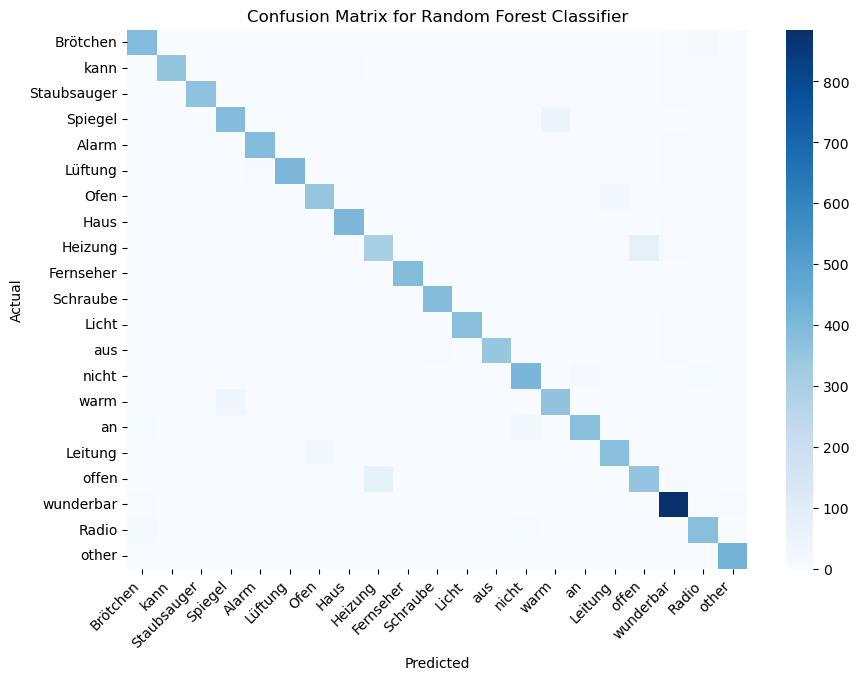

In [4]:
# Define your best parameters if you have already tuned them
best_params = {
    'n_estimators': 900,
    'max_features': 'auto',
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'bootstrap': False
}

# Initialize the Random Forest Classifier with best parameters
rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_flat, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

# Evaluate the classifier
accuracy = accuracy_score(y_test, rf_predictions)
report = classification_report(y_test, rf_predictions, digits=4)

print("Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(report)

# Generate the confusion matrix
confmat = confusion_matrix(y_test, rf_predictions)

# Load labels
y_labels = pd.read_csv("../Files/metadata/development.csv")['word']

# Define class names (replace with actual class names from your dataset)
classes = y_labels.unique().tolist()

plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(confmat, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Random Forest Classifier')


# Save the confusion matrix as a PNG file
plt.savefig('confusion_matrix.png')

plt.show()

In [25]:
# Define your best parameters if you have already tuned them
best_params = {
    'n_estimators': 1100,
    'max_features': 'auto',
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'bootstrap': False
}

# Initialize the Random Forest Classifier with best parameters
rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_flat, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

# Generate the confusion matrix
confmat = confusion_matrix(y_test, rf_predictions)

# Load labels
y_labels = pd.read_csv("../Files/metadata/development.csv")['word']

# Define class names (replace with actual class names from your dataset)
classes = y_labels.unique().tolist()

plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(confmat, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Random Forest Classifier')


# Save the confusion matrix as a PNG file
plt.savefig('confusion_matrix.png')

plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Classifier Performance:
Accuracy: 0.9291390728476822
              precision    recall  f1-score   support

       Alarm       0.92      0.95      0.94       412
    Brötchen       0.97      0.95      0.96       379
   Fernseher       0.97      0.94      0.95       388
        Haus       0.91      0.89      0.90       432
     Heizung       0.97      0.97      0.97       403
     Leitung       0.98      0.95      0.96       425
       Licht       0.92      0.89      0.91       387
     Lüftung       0.97      0.96      0.96       423
        Ofen       0.79      0.78      0.78       388
       Radio       0.98      0.97      0.97       404
    Schraube       0.96      0.97      0.97       398
     Spiegel       0.96      0.97      0.97       387
 Staubsauger       0.98      0.95      0.97       368
          an       0.93      0.93      0.93       442
         aus       0.88      0.90      0.89       401
        kann       0.94      0.90      0.92       421
       nicht  

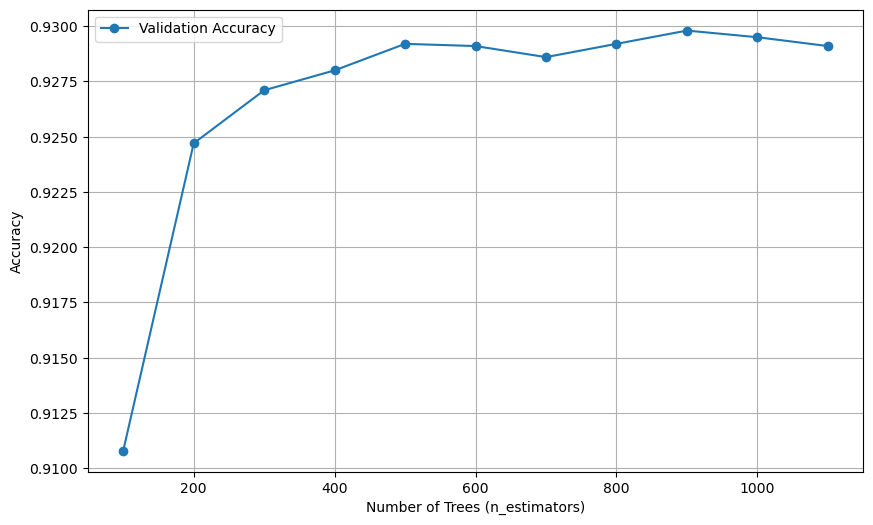

In [4]:
import matplotlib.pyplot as plt

# Given values
n_estimators_values = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100]
accuracy_values = [0.9108, 0.9247, 0.9271, 0.9280, 0.9292, 0.9291, 0.9286, 0.9292, 0.9298, 0.9295, 0.9291]

# Plotting the accuracy against the number of trees
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, accuracy_values, label='Validation Accuracy', marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
#plt.title('Validation Accuracy vs. Number of Trees')
plt.legend()
plt.grid(True)

# Save the plot as a file
plt.savefig('validation_accuracy_vs_num_trees.png')

# Display the plot
plt.show()


In [9]:
import os

# Function to get all file paths with a specific extension in a directory
def get_file_paths(directory, extension=".npy"):
    return [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(extension)]

# Function to load a numpy file and print its shape
def print_file_shapes(file_paths):
    for file_path in file_paths:
        data = np.load(file_path)
        print(f"File: {os.path.basename(file_path)}, Shape: {data.shape}")

# Directory containing the new .npy files
new_data_directory = "../Files/scene_analysis"
new_file_paths = get_file_paths(new_data_directory)

# Print the shapes of the files
print("Collected new file paths and their shapes:")
print_file_shapes(new_file_paths)


Collected new file paths and their shapes:
File: 2_Florian_Heizung_aus.npy, Shape: (1, 175, 854)
File: 3_Verena_Staubsauger_an_Alarm_an.npy, Shape: (1, 175, 762)
File: 5_Lukas_Staubsauger_an_Licht_aus.npy, Shape: (1, 175, 292)
File: 6_Deepak_Radio_aus_Licht_aus.npy, Shape: (1, 175, 243)


In [10]:
# Function to apply a sliding window to the data
def sliding_window(data, window_size, step_size):
    num_segments = (data.shape[2] - window_size) // step_size + 1
    segments = []
    for i in range(num_segments):
        start = i * step_size
        end = start + window_size
        segment = data[:, :, start:end]
        if segment.shape[2] == window_size:
            segments.append(segment)
    return np.array(segments)

# Parameters for sliding window
window_size = 44
step_size = 22  # Overlapping window with 50% overlap

# Process each file and apply the sliding window
all_segments = []
for file_path in new_file_paths:
    data = np.load(file_path)
    segments = sliding_window(data, window_size, step_size)
    all_segments.append(segments)

# Combine all segments into a single array
all_segments = np.vstack(all_segments)
print("Combined segments shape:", all_segments.shape)

Combined segments shape: (92, 1, 175, 44)


In [11]:
# Flatten the segments to match the input shape expected by the classifier
all_segments_flat = all_segments.reshape(all_segments.shape[0], -1)

# Predict using the Random Forest classifier
predictions = rf_classifier.predict(all_segments_flat)

# Print predictions for each segment
for i, file_path in enumerate(new_file_paths):
    num_segments = all_segments[i].shape[0]
    print(f"Predictions for file {os.path.basename(file_path)}:")
    for j in range(num_segments):
        print(f" Segment {j+1}: {predictions[i * num_segments + j]}")

Predictions for file 2_Florian_Heizung_aus.npy:
 Segment 1: other
Predictions for file 3_Verena_Staubsauger_an_Alarm_an.npy:
 Segment 1: other
Predictions for file 5_Lukas_Staubsauger_an_Licht_aus.npy:
 Segment 1: other
Predictions for file 6_Deepak_Radio_aus_Licht_aus.npy:
 Segment 1: other


In [13]:
import numpy as np
import os

# Function to get all file paths with a specific extension in a directory
def get_file_paths(directory, extension=".npy"):
    return [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(extension)]

# Function to load a numpy file and print its shape
def print_file_shapes(file_paths):
    for file_path in file_paths:
        data = np.load(file_path)
        print(f"File: {os.path.basename(file_path)}, Shape: {data.shape}")

# Function to apply a sliding window to the data
def sliding_window(data, window_size, step_size):
    num_segments = (data.shape[2] - window_size) // step_size + 1
    segments = []
    for i in range(num_segments):
        start = i * step_size
        end = start + window_size
        segment = data[:, :, start:end]
        if segment.shape[2] == window_size:
            segments.append(segment)
    return np.array(segments)

# Directory containing the new .npy files
new_data_directory = "../Files/scene_analysis"
new_file_paths = get_file_paths(new_data_directory)

# Parameters for sliding window
window_size = 44
step_size = 22  # Overlapping window with 50% overlap

# Process each file and apply the sliding window
all_segments = []
for file_path in new_file_paths:
    data = np.load(file_path)
    segments = sliding_window(data, window_size, step_size)
    print(f"File: {os.path.basename(file_path)}, Number of segments: {len(segments)}, Segment shape: {segments.shape}")
    all_segments.append(segments)

# Combine all segments into a single array
all_segments = np.vstack(all_segments)
print("Combined segments shape:", all_segments.shape)


File: 2_Florian_Heizung_aus.npy, Number of segments: 37, Segment shape: (37, 1, 175, 44)
File: 3_Verena_Staubsauger_an_Alarm_an.npy, Number of segments: 33, Segment shape: (33, 1, 175, 44)
File: 5_Lukas_Staubsauger_an_Licht_aus.npy, Number of segments: 12, Segment shape: (12, 1, 175, 44)
File: 6_Deepak_Radio_aus_Licht_aus.npy, Number of segments: 10, Segment shape: (10, 1, 175, 44)
Combined segments shape: (92, 1, 175, 44)


In [16]:
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier

# Function to get all file paths with a specific extension in a directory
def get_file_paths(directory, extension=".npy"):
    return [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(extension)]

# Function to apply a sliding window to the data
def sliding_window(data, window_size, step_size):
    num_segments = (data.shape[2] - window_size) // step_size + 1
    segments = []
    for i in range(num_segments):
        start = i * step_size
        end = start + window_size
        segment = data[:, :, start:end]
        if segment.shape[2] == window_size:
            segments.append(segment)
    return np.array(segments)

# Function to process each file and make predictions
def process_and_predict(file_paths, window_size, step_size, model):
    for file_path in file_paths:
        data = np.load(file_path)
        segments = sliding_window(data, window_size, step_size)
        num_segments = len(segments)
        
        # Flatten segments for prediction
        segments_flat = segments.reshape(num_segments, -1)
        
        # Predict using the Random Forest classifier
        predictions = model.predict(segments_flat)
        
        # Print predictions for each segment in the file
        print(f"Predictions for file {os.path.basename(file_path)}:")
        for j in range(num_segments):
            print(f" Segment {j + 1}: {predictions[j]}")

# Directory containing the new .npy files
new_data_directory = "../Files/scene_analysis"
new_file_paths = get_file_paths(new_data_directory)

# Parameters for sliding window
window_size = 44
step_size = 22  # Overlapping window with 50% overlap

# Load your pre-trained Random Forest classifier
# Example: rf_classifier = RandomForestClassifier().fit(X_train, y_train)
# Here we assume that `rf_classifier` is already trained

# Process each file and predict
process_and_predict(new_file_paths, window_size, step_size, rf_classifier)


Predictions for file 2_Florian_Heizung_aus.npy:
 Segment 1: other
 Segment 2: other
 Segment 3: other
 Segment 4: other
 Segment 5: other
 Segment 6: other
 Segment 7: other
 Segment 8: other
 Segment 9: other
 Segment 10: other
 Segment 11: other
 Segment 12: other
 Segment 13: other
 Segment 14: other
 Segment 15: other
 Segment 16: other
 Segment 17: other
 Segment 18: other
 Segment 19: other
 Segment 20: other
 Segment 21: other
 Segment 22: other
 Segment 23: Fernseher
 Segment 24: other
 Segment 25: other
 Segment 26: other
 Segment 27: Heizung
 Segment 28: other
 Segment 29: aus
 Segment 30: other
 Segment 31: other
 Segment 32: other
 Segment 33: other
 Segment 34: other
 Segment 35: other
 Segment 36: other
 Segment 37: other
Predictions for file 3_Verena_Staubsauger_an_Alarm_an.npy:
 Segment 1: other
 Segment 2: other
 Segment 3: other
 Segment 4: other
 Segment 5: other
 Segment 6: other
 Segment 7: other
 Segment 8: other
 Segment 9: other
 Segment 10: other
 Segment 11: o

In [17]:
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier

# Function to get all file paths with a specific extension in a directory
def get_file_paths(directory, extension=".npy"):
    return [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(extension)]

# Function to apply a sliding window to the data
def sliding_window(data, window_size, step_size):
    num_segments = (data.shape[2] - window_size) // step_size + 1
    segments = []
    for i in range(num_segments):
        start = i * step_size
        end = start + window_size
        segment = data[:, :, start:end]
        if segment.shape[2] == window_size:
            segments.append(segment)
    return np.array(segments)

# Function to process each file and make predictions
def process_and_predict(file_paths, window_size, step_size, model):
    for file_path in file_paths:
        data = np.load(file_path)
        segments = sliding_window(data, window_size, step_size)
        num_segments = len(segments)
        
        # Flatten segments for prediction
        segments_flat = segments.reshape(num_segments, -1)
        
        # Predict using the Random Forest classifier
        predictions = model.predict(segments_flat)
        
        # Print predictions for each segment in the file
        print(f"Predictions for file {os.path.basename(file_path)}:")
        prediction_str = ', '.join([f"Segment {j + 1}: {pred}" for j, pred in enumerate(predictions)])
        print(prediction_str)
        print()  # For better readability

# Directory containing the new .npy files
new_data_directory = "../Files/scene_analysis"
new_file_paths = get_file_paths(new_data_directory)

# Parameters for sliding window
window_size = 44
step_size = 22  # Overlapping window with 50% overlap

# Load your pre-trained Random Forest classifier
# Example: rf_classifier = RandomForestClassifier().fit(X_train, y_train)
# Here we assume that `rf_classifier` is already trained

# Process each file and predict
process_and_predict(new_file_paths, window_size, step_size, rf_classifier)


Predictions for file 2_Florian_Heizung_aus.npy:
Segment 1: other, Segment 2: other, Segment 3: other, Segment 4: other, Segment 5: other, Segment 6: other, Segment 7: other, Segment 8: other, Segment 9: other, Segment 10: other, Segment 11: other, Segment 12: other, Segment 13: other, Segment 14: other, Segment 15: other, Segment 16: other, Segment 17: other, Segment 18: other, Segment 19: other, Segment 20: other, Segment 21: other, Segment 22: other, Segment 23: Fernseher, Segment 24: other, Segment 25: other, Segment 26: other, Segment 27: Heizung, Segment 28: other, Segment 29: aus, Segment 30: other, Segment 31: other, Segment 32: other, Segment 33: other, Segment 34: other, Segment 35: other, Segment 36: other, Segment 37: other

Predictions for file 3_Verena_Staubsauger_an_Alarm_an.npy:
Segment 1: other, Segment 2: other, Segment 3: other, Segment 4: other, Segment 5: other, Segment 6: other, Segment 7: other, Segment 8: other, Segment 9: other, Segment 10: other, Segment 11: ot

In [18]:
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier

# Function to get all file paths with a specific extension in a directory
def get_file_paths(directory, extension=".npy"):
    return [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(extension)]

# Function to apply a sliding window to the data
def sliding_window(data, window_size, step_size):
    num_segments = (data.shape[2] - window_size) // step_size + 1
    segments = []
    for i in range(num_segments):
        start = i * step_size
        end = start + window_size
        segment = data[:, :, start:end]
        if segment.shape[2] == window_size:
            segments.append(segment)
    return np.array(segments)

# Function to process each file and make predictions
def process_and_predict(file_paths, window_size, step_size, model):
    for file_path in file_paths:
        data = np.load(file_path)
        segments = sliding_window(data, window_size, step_size)
        num_segments = len(segments)
        
        # Flatten segments for prediction
        segments_flat = segments.reshape(num_segments, -1)
        
        # Predict using the Random Forest classifier
        predictions = model.predict(segments_flat)
        
        # Print predictions for each file
        print(f"Predictions for file {os.path.basename(file_path)}:")
        print(' '.join(predictions))
        print()  # For better readability

# Directory containing the new .npy files
new_data_directory = "../Files/scene_analysis"
new_file_paths = get_file_paths(new_data_directory)

# Parameters for sliding window
window_size = 44
step_size = 22  # Overlapping window with 50% overlap

# Load your pre-trained Random Forest classifier
# Example: rf_classifier = RandomForestClassifier().fit(X_train, y_train)
# Here we assume that `rf_classifier` is already trained

# Process each file and predict
process_and_predict(new_file_paths, window_size, step_size, rf_classifier)


Predictions for file 2_Florian_Heizung_aus.npy:
other other other other other other other other other other other other other other other other other other other other other other Fernseher other other other Heizung other aus other other other other other other other other

Predictions for file 3_Verena_Staubsauger_an_Alarm_an.npy:
other other other other other other other other other other other other other other other other other other other other other other other other other other other other other other other other other

Predictions for file 5_Lukas_Staubsauger_an_Licht_aus.npy:
other other other other other other other other other aus other other

Predictions for file 6_Deepak_Radio_aus_Licht_aus.npy:
other other other other other other other other other other



In [9]:

import os


# Function to get all file paths with a specific extension in a directory
def get_file_paths(directory, extension=".npy"):
    return [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(extension)]

# Function to apply a sliding window to the data
def sliding_window(data, window_size, step_size):
    num_segments = (data.shape[2] - window_size) // step_size + 1
    segments = []
    for i in range(num_segments):
        start = i * step_size
        end = start + window_size
        segment = data[:, :, start:end]
        if segment.shape[2] == window_size:
            segments.append(segment)
    return np.array(segments)

# Function to process each file and make predictions with probabilities
def process_and_predict_with_probabilities(file_paths, window_size, step_size, model, keywords, threshold=0.5):
    for file_path in file_paths:
        data = np.load(file_path)
        segments = sliding_window(data, window_size, step_size)
        num_segments = len(segments)
        
        # Flatten segments for prediction
        segments_flat = segments.reshape(num_segments, -1)
        
        # Predict probabilities using the Random Forest classifier
        probabilities = model.predict_proba(segments_flat)
        class_indices = {model.classes_[i]: i for i in range(len(model.classes_))}
        
        # Filter and format predictions with probabilities
        formatted_predictions = []
        for i in range(num_segments):
            prediction_probs = [(model.classes_[class_idx], prob) for class_idx, prob in enumerate(probabilities[i]) if prob > threshold and model.classes_[class_idx] in keywords]
            prediction_probs = sorted(prediction_probs, key=lambda x: x[1], reverse=True)
            formatted_predictions.append(prediction_probs[0][0] if prediction_probs else "unknown")
        
        # Print predictions for each file
        print(f"Predictions for file {os.path.basename(file_path)}:")
        print(' '.join(formatted_predictions))
        print()  # For better readability

# Directory containing the new .npy files
new_data_directory = "../Files/scene_analysis"
new_file_paths = get_file_paths(new_data_directory)

# Parameters for sliding window
window_size = 44
step_size = 22  # Overlapping window with 50% overlap

# Load your pre-trained Random Forest classifier
# Example: rf_classifier = RandomForestClassifier().fit(X_train, y_train)
# Here we assume that `rf_classifier` is already trained

# List of specified keywords
keywords = [
    "Alarm", "Brötchen", "Fernseher", "Haus", "Heizung", "Leitung", "Licht", "Lüftung", 
    "Ofen", "Radio", "Schraube", "Spiegel", "Staubsauger", "an", "aus", "kann", 
    "nicht", "offen", "warm", "wunderbar"
]

# Process each file and predict
process_and_predict_with_probabilities(new_file_paths, window_size, step_size, rf_classifier, keywords, threshold=0.2)


Predictions for file 2_Florian_Heizung_aus.npy:
unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown Fernseher unknown unknown unknown Heizung unknown aus unknown unknown unknown unknown unknown unknown wunderbar unknown

Predictions for file 3_Verena_Staubsauger_an_Alarm_an.npy:
unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown

Predictions for file 5_Lukas_Staubsauger_an_Licht_aus.npy:
unknown unknown unknown unknown unknown unknown unknown unknown unknown aus unknown unknown

Predictions for file 6_Deepak_Radio_aus_Licht_aus.npy:
unknown unknown unknown unknown unknown unknown unknown unknown unknown unknown

